#  ИНТЕРФЕРОМЕТРИЧЕСКОЕ ОПРЕДЕЛЕНИЕ КОЭФФИЦИЕНТА ПРЕЛОМЛЕНИЯ ПЛАВЛЕНОГО КВАРЦА НА МИЛЛИМЕТРОВЫХ ВОЛНАХ. 

In [17]:
%matplotlib inline
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
d0001 = pd.read_csv('D0001.txt', header = None, sep = '	')
d1100 = pd.read_csv('D1100.txt', header = None, sep = '	')
d0002 = pd.read_csv('D0002.txt', header = None, sep = '	')
d2200 = pd.read_csv('D2200.txt', header = None, sep = '	')
d1100[1] = d1100[1]/np.max(d1100[1])
d0002[1] = d0002[1]/np.max(d0002[1])
d2200[1] = d2200[1]/np.max(d2200[1])

Функция аппроксимации:

In [19]:
def spektr(x, R, A):
    lamnda = 11.59
    F = 3.35
    result = (((1.0 - A/(1.0 - R))**2)/(1.0 + (4.0*R/(1.0 - R)**2)*(np.sin(2.0*np.pi*x/lamnda + F))**2))
    return result

## D1100

In [20]:
popt, pcov = opt.curve_fit(spektr, np.array(d1100[0]), np.array(d1100[1]),
                           bounds = ([0.08, 0], [0.092056, 0.394]), p0 = [ 0.0852,   0.3753])

In [21]:
print('_____________________________________________________\n')
print('значение R=', popt[0], chr(177), np.sqrt(np.diag(pcov))[0])
print('значение A=', popt[1], chr(177), np.sqrt(np.diag(pcov))[1])
print('значение T=1-R-A=', 1-popt[0]-popt[1],chr(177), sum(np.sqrt(np.diag(pcov))))
print('_____________________________________________________')

_____________________________________________________

значение R= 0.0904103881674 ± 0.00256319736221
значение A= 0.00831375379448 ± 0.00272004186548
значение T=1-R-A= 0.901275858038 ± 0.00528323922769
_____________________________________________________


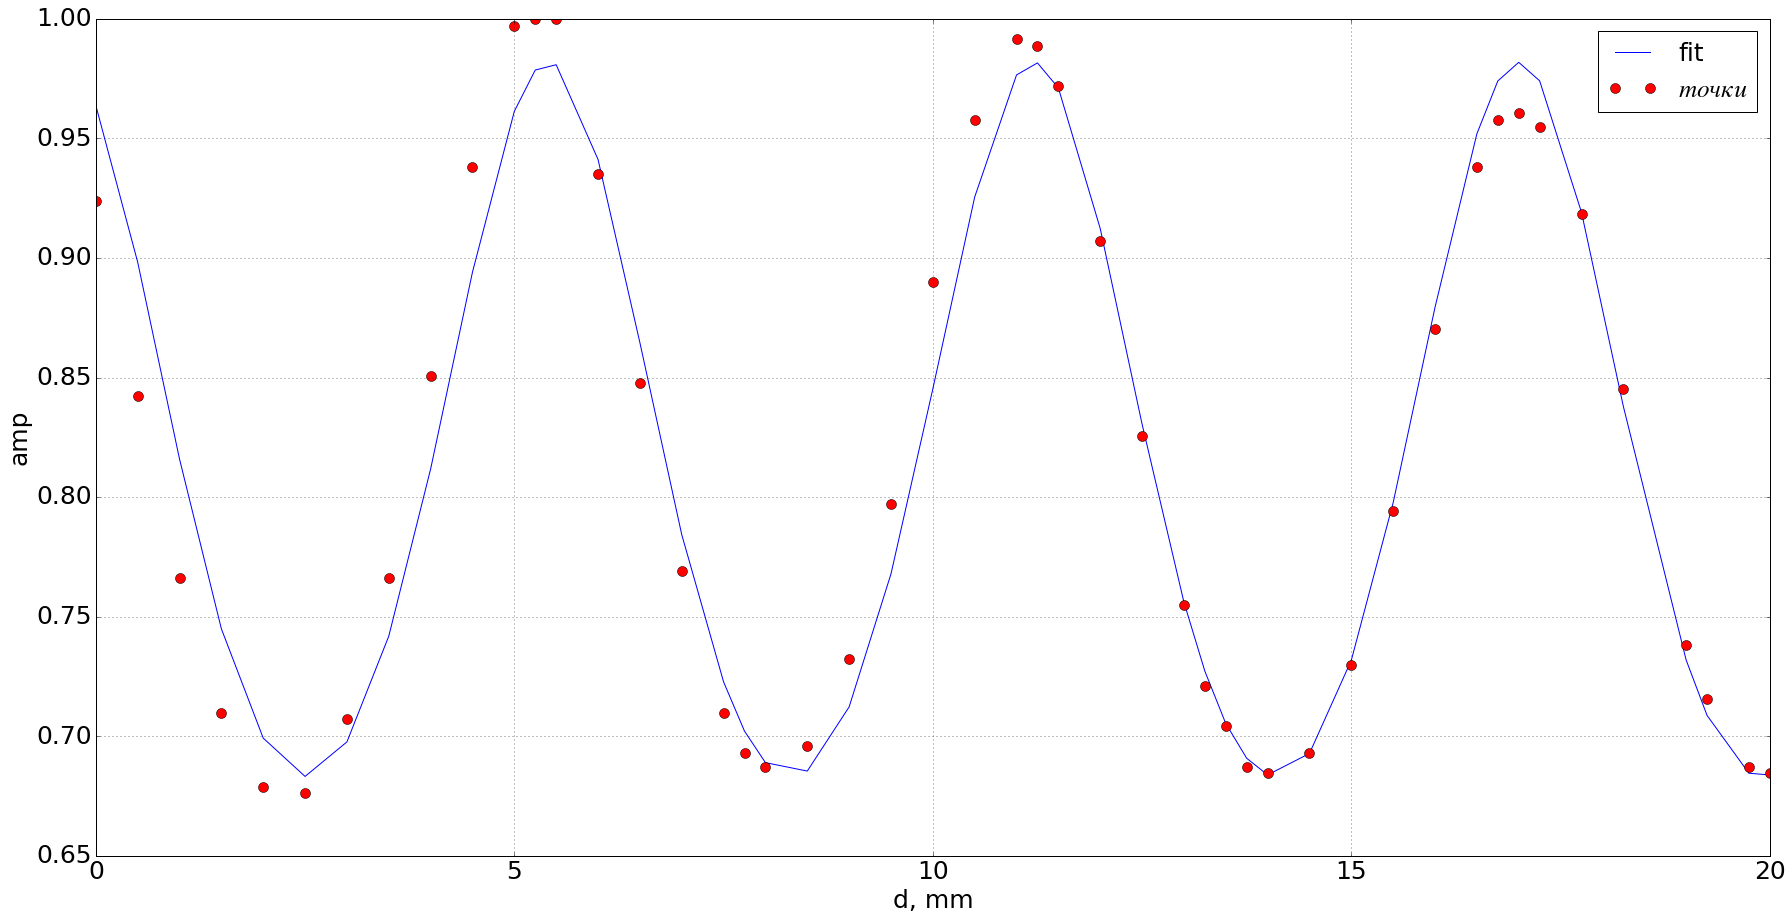

In [22]:
plt.figure(figsize = (30,15))
plt.plot(d1100[0], spektr(d1100[0], *popt), 'b-', d1100[0], d1100[1], 'ro', ms = 10 )
plt.legend(['fit', '$точки$'], fontsize = 25)
plt.ylabel('amp', fontsize = 25)
plt.xlabel('d, mm', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid()
plt.savefig('40.jpg', dpi = 300)
plt.show()

In [23]:
print('_____________________________________________________\n')
alf1100 = (1+popt[0])/(1-popt[0])
print('n=',alf1100+np.sqrt(alf1100**2-1))
print('_____________________________________________________')

_____________________________________________________

n= 1.85993416243
_____________________________________________________


## D2200

In [24]:
popt1, pcov1 = opt.curve_fit(spektr, np.array(d2200[0]), np.array(d2200[1]),
                           bounds = (0, [0.095, 0.1]), p0 = [ 0.07,   0.1])

In [25]:
print('_____________________________________________________\n')
print('значение R=', popt1[0], chr(177), np.sqrt(np.diag(pcov))[0])
print('значение A=', popt1[1], chr(177), np.sqrt(np.diag(pcov))[1])
print('значение T=1-R-A=', 1-popt1[0]-popt1[1],chr(177), sum(np.sqrt(np.diag(pcov))))
print('_____________________________________________________')

_____________________________________________________

значение R= 0.095 ± 0.00256319736221
значение A= 0.0114210493495 ± 0.00272004186548
значение T=1-R-A= 0.89357895065 ± 0.00528323922769
_____________________________________________________


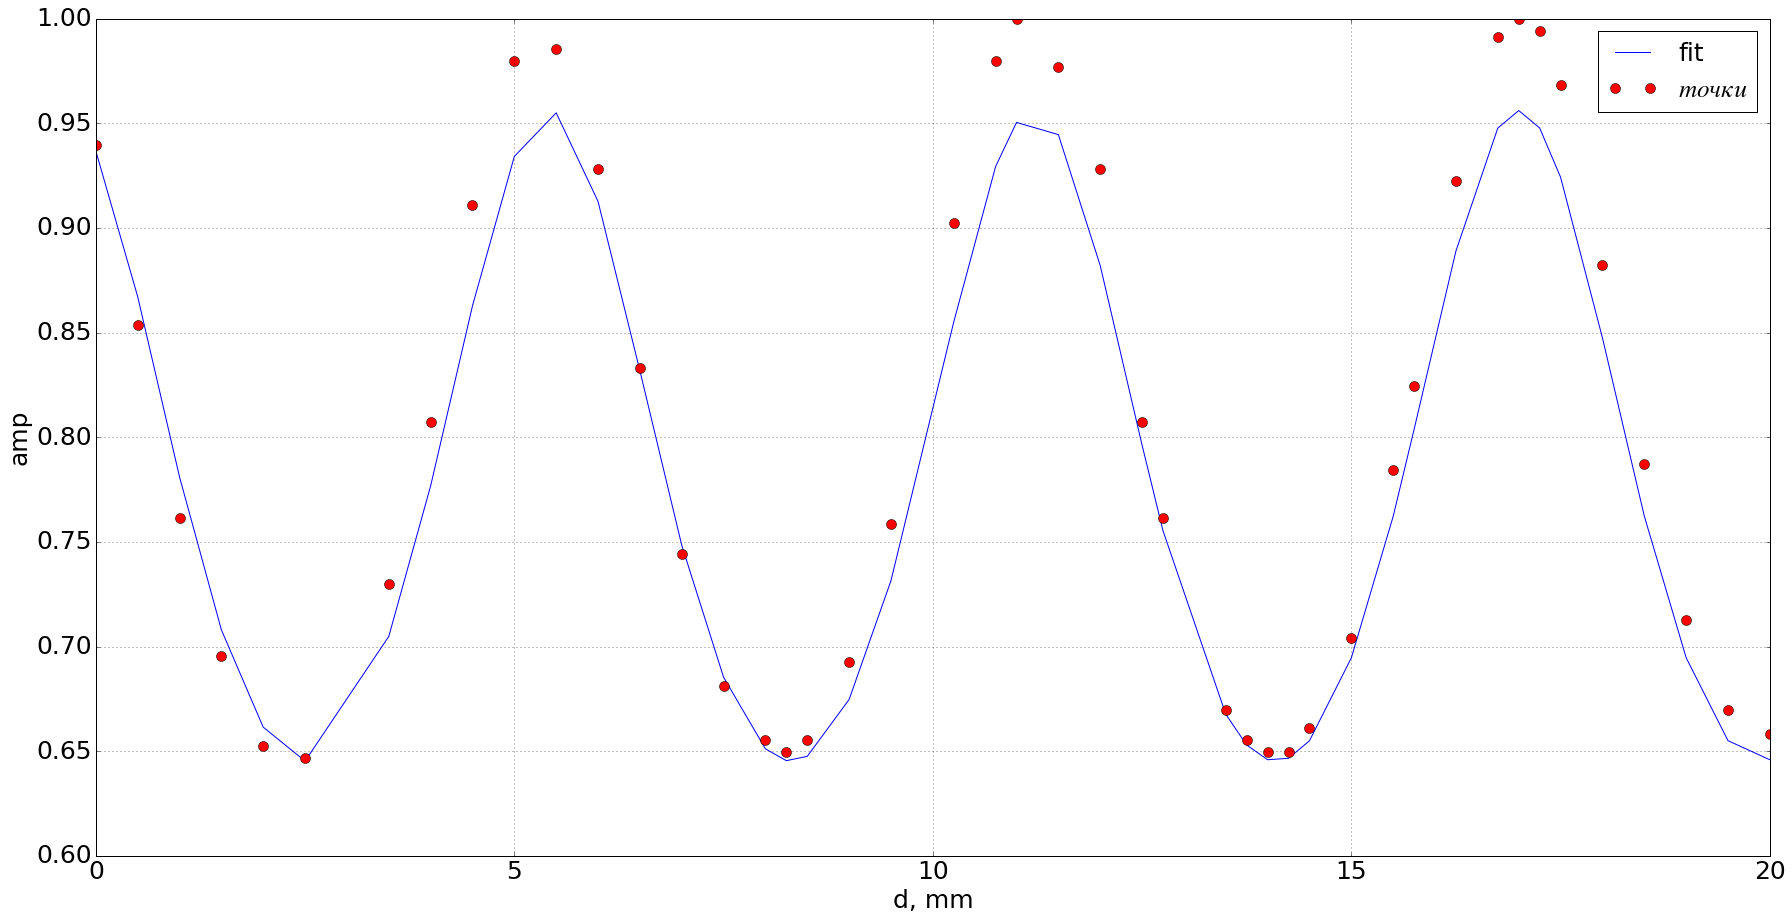

In [26]:
plt.figure(figsize = (30,15))
plt.plot(d2200[0], spektr(d2200[0], 0.098, 0.02), 'b-', d2200[0], d2200[1], 'ro', ms = 10 )
plt.legend(['fit', '$точки$'], fontsize = 25)
plt.ylabel('amp', fontsize = 25)
plt.xlabel('d, mm', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid()
plt.savefig('41.jpg', dpi = 250)
plt.show()

In [27]:
print('_____________________________________________________\n')
alf2200 = (1+popt1[0])/(1-popt1[0])
print('n=',alf2200+np.sqrt(alf2200**2-1))
print('_____________________________________________________')

_____________________________________________________

n= 1.89109546994
_____________________________________________________


## D0002

In [28]:
popt2, pcov2 = opt.curve_fit(spektr, np.array(d0002[0]), np.array(d0002[1]),
                           bounds = (0, [0.096, 0.09]), p0 = [ 0.03,   0.0005])

In [29]:
print('_____________________________________________________\n')
print('значение R=', popt2[0], chr(177), np.sqrt(np.diag(pcov))[0])
print('значение A=', popt2[1], chr(177), np.sqrt(np.diag(pcov))[1])
print('значение T=1-R-A=', 1-popt2[0]-popt2[1],chr(177), sum(np.sqrt(np.diag(pcov))))
print('_____________________________________________________')

_____________________________________________________

значение R= 0.090410383735 ± 0.00256319736221
значение A= 0.00831375739978 ± 0.00272004186548
значение T=1-R-A= 0.901275858865 ± 0.00528323922769
_____________________________________________________


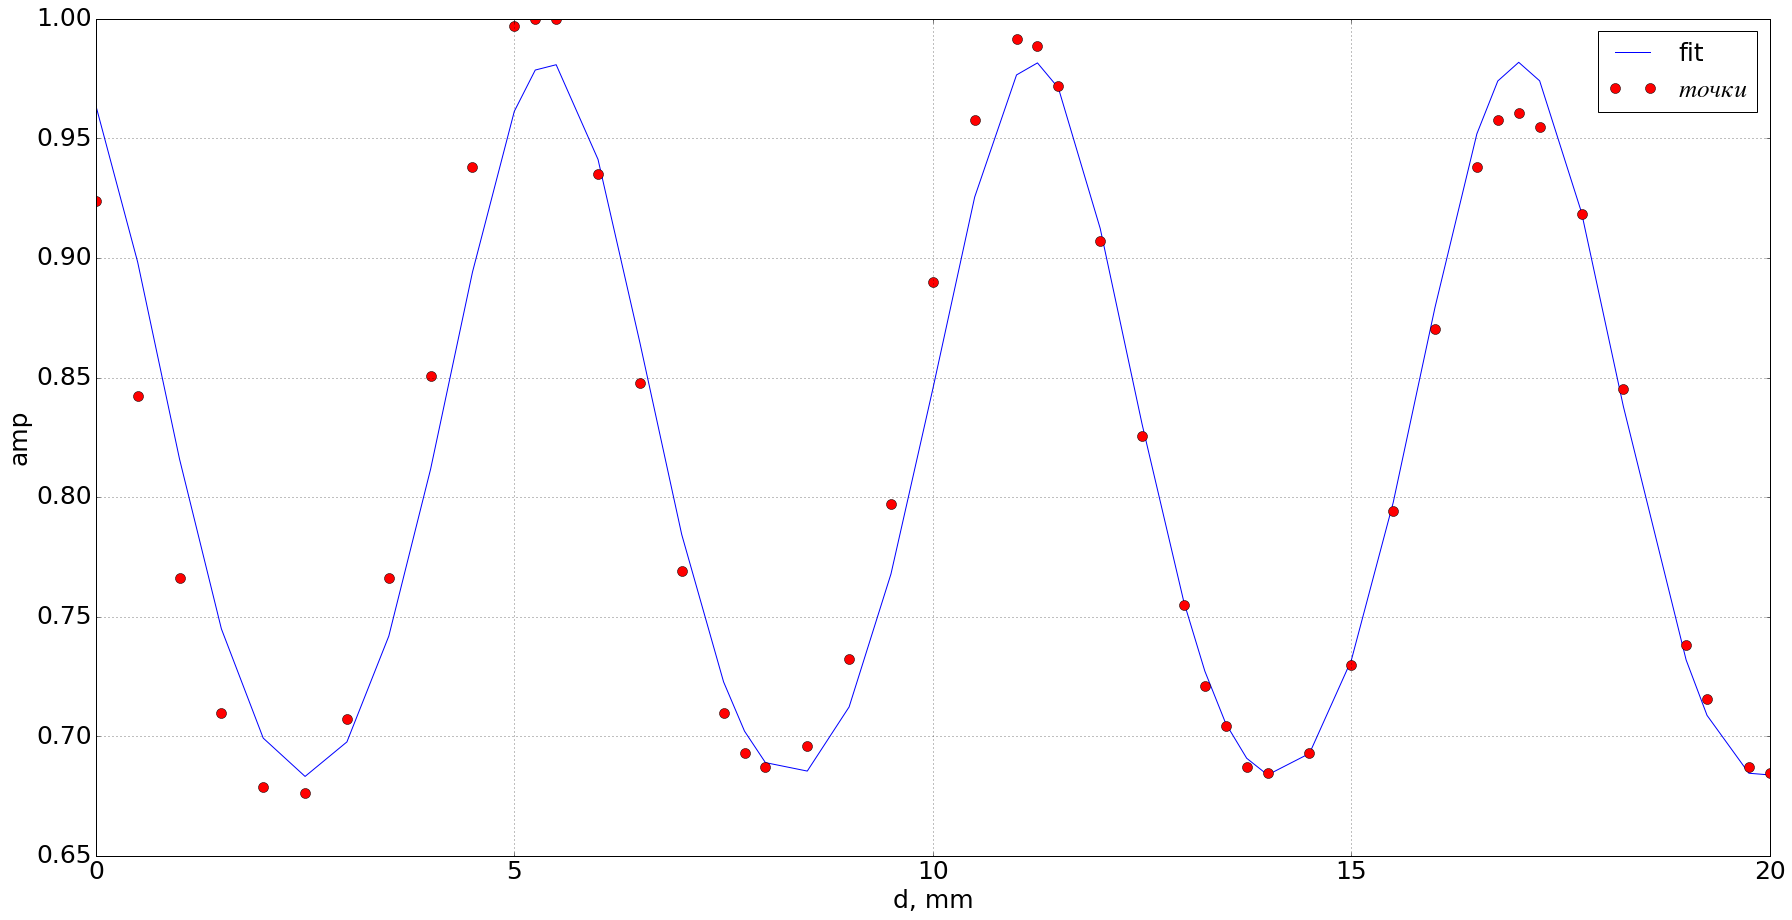

In [30]:
plt.figure(figsize = (30,15))
plt.plot(d0002[0], spektr(d0002[0], *popt2), 'b-', d0002[0], d0002[1], 'ro', ms = 10 )
plt.legend(['fit', '$точки$'], fontsize = 25)
plt.ylabel('amp', fontsize = 25)
plt.xlabel('d, mm', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.grid()
plt.savefig('42.jpg', dpi = 230)
plt.show()

In [31]:
print('_____________________________________________________\n')
alf0002 = (1+popt2[0])/(1-popt2[0])
print('n=',alf0002+np.sqrt(alf0002**2-1))
print('_____________________________________________________')

_____________________________________________________

n= 1.85993413229
_____________________________________________________


## Таблица значений n:

In [33]:
print('Таблица значений n для разных комбинаций поглотителей')
pd.DataFrame({'n':[alf1100+np.sqrt(alf1100**2-1),
                   alf2200+np.sqrt(alf2200**2-1),
                   alf0002+np.sqrt(alf0002**2-1)]},
             index = ['D1100', 'D2200', 'D0002'])

Таблица значений n для разных комбинаций поглотителей


,n
D1100,1.859934
D2200,1.891095
D0002,1.859934
